In [1]:
from scipy.stats import ttest_ind
import pandas as pd

# Dataset from Matzke et al. (2015). In this dataset, participants performed a memory task in which they recalled a list of words. 
# During the retention interval, one group of participants looked at a central fixation dot on a display. 
# Another group of participants continuously made horizontal eye movements, which is believed by some to improve memory.
dm = pd.read_csv('matzke_et_al.csv')

dm_horizontal = dm[dm.Condition=='Horizontal']
dm_fixation = dm[dm.Condition=='Fixation']

t, p = ttest_ind(dm_horizontal.CriticalRecall, dm_fixation.CriticalRecall)
print('t = {:.3f}, p = {:.3f}'.format(t, p))

t = -2.845, p = 0.007


In [2]:
# This reveals a significant difference (p = .0066). However, as you can see in the figure below, the effect goes in the opposite direction from the prediction, such that the fixation group performed best.

# You can also use the ttest() function from pingouin. This also provides a Bayes Factor, for those who are into Bayesian statistics.

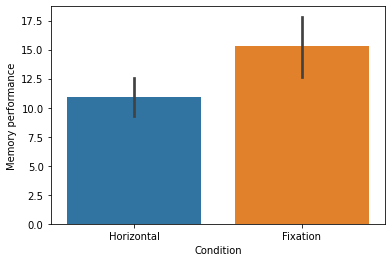

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt # visualization

sns.barplot(x='Condition', y='CriticalRecall', data=dm)
plt.xlabel('Condition')
plt.ylabel('Memory performance')
plt.show()

In [6]:
from scipy.stats import ttest_rel

# Dataset from Moore, McCabe, & Craig of aggressive behavior from people suffering from dementia was measured during full moon and another phase of the lunar cycle. 
# Each participant was measured at both phases, i.e. this was a within-subject design.
dm = pd.read_csv('moon-aggression.csv')

t, p = ttest_rel(dm.Moon, dm.Other)
print('t = {:.3f}, p = {:.3f}'.format(t, p))

t = 6.452, p = 0.000


In [45]:
from statsmodels.stats.anova import anova_lm

# Heart-rate data from Moore, McCabe, and Craig. This dataset contains two factors that vary between subjects (Gender and Group) and one dependent variable (Heart Rate).
dm = pd.read_csv('heartrate.csv')
dm = dm.rename({'Heart Rate':'HeartRate'},axis=1)  # statsmodels doesn't like spaces
df = anova_lm(ols('HeartRate ~ Gender * Group', data=dm).fit())
print(df)

                 df      sum_sq        mean_sq           F         PR(>F)
Gender          1.0   45030.005   45030.005000  185.979949   3.287945e-38
Group           1.0  168432.080  168432.080000  695.647040  1.149926e-110
Gender:Group    1.0    1794.005    1794.005000    7.409481   6.629953e-03
Residual      796.0  192729.830     242.122902         NaN            NaN


In [7]:
from statsmodels.formula.api import ols

# dataset from Moore, McCabe, & Craig which contains grade-point averages (gpa) and SAT scores for mathematics (satm) and verbal knowledge (satv) for 500 high-school students. 
dm = pd.read_csv('gpa.csv')
model = ols('gpa ~ satm + satv', data=dm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.476
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           0.000722
Time:                        13:40:56   Log-Likelihood:                -254.18
No. Observations:                 224   AIC:                             514.4
Df Residuals:                     221   BIC:                             524.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2887      0.376      3.427      0.0

In [9]:
import numpy as np

df = pd.DataFrame([(.2, .3,.8), (.0, .6,.9), (.6, .0,.4), (.2, .1,.9),
                   (.1, .3,.7), (.1, .5,.6), (.7, .1,.5), (.3, .0,.8),],
                  columns=['dogs', 'cats','birds'])

corr_mat = df.corr()
corr_mat

,dogs,cats,birds
dogs,1.000000,-0.740432,-0.742781
cats,-0.740432,1.000000,0.340799
birds,-0.742781,0.340799,1.000000


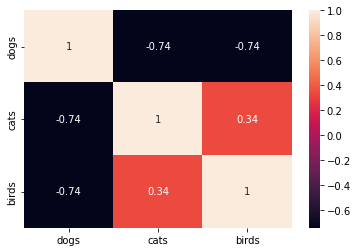

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
# Then, add the following syntax at the bottom of the code:

sn.heatmap(corr_mat, annot=True)
plt.show()

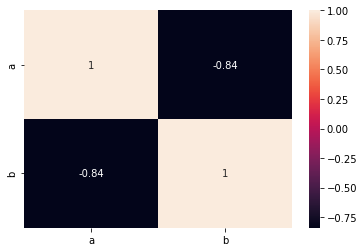

In [11]:
np.random.seed(123)
df1=pd.DataFrame( np.random.randn(3,2), columns=list('ab') )
df2=pd.DataFrame( np.random.randn(3,2), columns=list('ac') )


corr_mat = df1.corr()
sn.heatmap(corr_mat, annot=True)
plt.show()

In [12]:
# You can compare columns of df1 & df2 with corrwith. Note that only columns with the same names are compared:

df1.corrwith(df2)

a    0.993085
b         NaN
c         NaN
dtype: float64

In [13]:
df1.corrwith(df2.set_axis( df1.columns, axis='columns', inplace=False))

a    0.993085
b    0.969220
dtype: float64

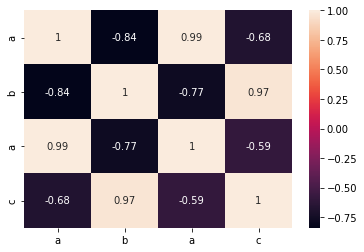

In [14]:
corr_mat = pd.concat([df1,df2],axis=1).corr()
sn.heatmap(corr_mat, annot=True)
plt.show()

In [40]:
import random
import numpy as np
import pandas as pd

ds = pd.DataFrame(columns = ['x','y'])
ds['x'] = [int(n>500) for n in random.sample(range(0, 1000), 100)]
ds['y'] = [int(n<500) for n in random.sample(range(0, 1000), 100)]
ds.head()

,x,y
0,0,0
1,0,1
2,1,0
3,0,1
4,1,0


In [41]:
base = ds[ds.x == 0]
variant = ds[ds.x == 1]
# We use the z-score value for .95 confidency of the normal interval
delta = variant.y.mean() - base.y.mean()
delta_err = 1.96 * np.sqrt(
    variant.y.var() / variant.shape[0] + 
    base.y.var() / base.shape[0])

print({"estimated_effect": delta, "standard_error": delta_err})

{'estimated_effect': -0.02101723413198825, 'standard_error': 0.20312418042730232}


In [42]:
base = ds[ds.x == 0]
variant = ds[ds.x == 1]
# We use the z-score value for .95 confidency of the normal interval
delta = variant.y.mean() - base.y.mean()
delta_err = 1.96 * np.sqrt(
    variant.y.var() / variant.shape[0] + 
    base.y.var() / base.shape[0])

print({"estimated_effect": delta, "standard_error": delta_err})

{'estimated_effect': -0.02101723413198825, 'standard_error': 0.20312418042730232}


In [44]:
from scipy.stats import chi2_contingency

contingency_table = (
    ds
    .assign(placeholder=1)
    .pivot_table(index="x", columns="y", values="placeholder", aggfunc="sum")
    .values
)

_, p, _, _ = chi2_contingency(contingency_table, lambda_="log-likelihood")

print("P-value:",p)

P-value: 1.0


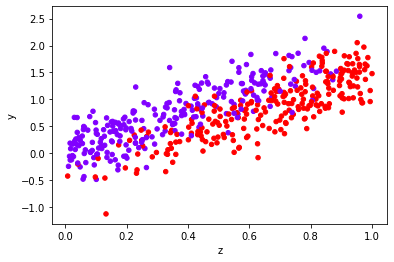

In [ ]:
observed_data_1 = pd.read_csv('observed_data_1.csv' )

observed_data_1.plot.scatter(x="z", y="y", c="x", cmap="rainbow", colorbar=False);

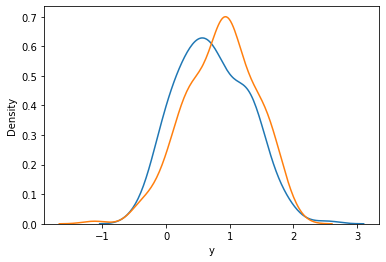

In [ ]:
import seaborn as sns

sns.kdeplot(observed_data_1.loc[lambda df: df.x == 0].y, label="untreated")
sns.kdeplot(observed_data_1.loc[lambda df: df.x == 1].y, label="treated")

In [ ]:
!pip install causalinference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 3.5 MB/s 


In [ ]:
from causalinference import CausalModel

cm = CausalModel(
    Y=observed_data_1.y.values, 
    D=observed_data_1.x.values, 
    X=observed_data_1.z.values)

cm.est_via_ols(adj=1)

print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.483      0.032    -14.993      0.000     -0.546     -0.420



/usr/local/lib/python3.7/dist-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


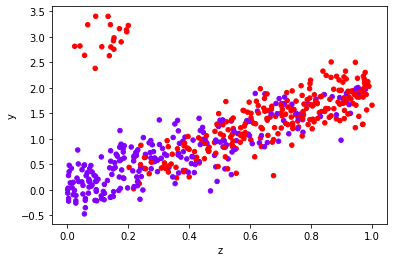

In [ ]:
observed_data_2 = pd.read_csv('observed_data_2.csv')

observed_data_2.plot.scatter(x="z", y="y", c="x", cmap="rainbow", colorbar=False)

In [ ]:
cm = CausalModel(
    Y=observed_data_2.y.values, 
    D=observed_data_2.x.values, 
    X=observed_data_2.z.values)

cm.est_via_ols(adj=1)

print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.472      0.090      5.236      0.000      0.295      0.648



/usr/local/lib/python3.7/dist-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


In [46]:
from sklearn import preprocessing
x_train = pd.DataFrame([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]],columns=['x','y','z'])
scaler = preprocessing.StandardScaler().fit(x_train)
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [47]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [48]:
x_scaled = scaler.transform(x_train)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)

In [51]:
from sklearn.datasets import load_iris
data = load_iris()
x, y = data['data'],data['target']
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=5)
x_train_qt = quantile_transformer.fit_transform(x)
x_train_qt[:5]

array([[0.25      , 0.79545455, 0.16666667, 0.125     ],
       [0.1875    , 0.5       , 0.16666667, 0.125     ],
       [0.125     , 0.66666667, 0.125     , 0.125     ],
       [0.09375   , 0.58333333, 0.20833333, 0.125     ],
       [0.21875   , 0.81818182, 0.16666667, 0.125     ]])

In [52]:
quantile_transformer.quantiles_ 

array([[4.3 , 2.  , 1.  , 0.1 ],
       [5.1 , 2.8 , 1.6 , 0.3 ],
       [5.8 , 3.  , 4.35, 1.3 ],
       [6.4 , 3.3 , 5.1 , 1.8 ],
       [7.9 , 4.4 , 6.9 , 2.5 ]])

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(set(y)), random_state=0).fit(x)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [54]:
kmeans.predict(x[0].reshape(1,-1))

array([1], dtype=int32)

In [55]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [61]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92461872 0.05306648]
[25.09996044  6.01314738]


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
data_reg = load_diabetes()
x,y = data_reg['data'],data_reg['target']
reg = LinearRegression().fit(x, y)
reg.score(x, y) 

0.5177494254132934

In [64]:
reg.coef_  

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [65]:
reg.intercept_ 

152.1334841628965

In [66]:
print('Predicted:',reg.predict(x[10].reshape(1,-1)),'Actual:',y[10])  

Predicted: [97.07853583] Actual: 101.0


In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

data_class = load_digits()
x,y = data_class['data'],data_class['target']
clf = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',C=.1))
clf.fit(x, y)
clf.predict(x[:2, :]) 

array([0, 1])

In [69]:
clf.score(x, y)

0.988313856427379

In [70]:
x, y = load_iris(return_X_y=True)
x.shape, y.shape

((150, 4), (150,))

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [72]:
x_train.shape, y_train.shape

((90, 4), (90,))

In [73]:
x_test.shape, y_test.shape  

((60, 4), (60,))

In [74]:
clf = svm.SVC(kernel='linear', C=.7).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9666666666666667

In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5)

In [77]:
print('Mean:',scores.mean(),'Standard Deviation:', scores.std())

Mean: 0.9866666666666667 Standard Deviation: 0.01632993161855452


In [78]:
from sklearn import metrics
scores = cross_val_score(clf, x, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 1.        , 0.96658312, 1.        ])

In [79]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, x, y, cv=cv)

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])